Realistic loan dataset that would be suitable for building a loan approval prediction model

In [497]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.inspection import permutation_importance


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [498]:
df = pd.read_csv('loan_data_balanced_fixed.csv')
df.tail()

,Age,Income,Employment_Length,Home_Ownership,Debt_to_Income,Credit_Score,Delinquencies_2yrs,Public_Records,Loan_Status,Loan_ID,Loan_Amount,Loan_Term,Loan_Purpose,Revolving_Utilization,Denial_Reason
995,53,69424.0,29.0,MORTGAGE,22.472888,798,0,0,1,LP0996,25753,60,medical,11.957700,NaN
996,49,82626.0,17.0,OWN,11.311453,721,0,0,1,LP0997,32455,48,debt_consolidation,19.461049,NaN
997,41,NaN,1.0,RENT,48.875465,628,1,0,0,LP0998,7775,24,medical,63.401421,High DTI
998,38,68119.0,15.0,MORTGAGE,12.691095,730,0,0,1,LP0999,6811,36,medical,13.526445,NaN
999,35,44678.0,21.0,MORTGAGE,19.530072,737,0,0,1,LP1000,13484,48,home_improvement,8.905908,NaN


In [499]:
df.describe()

,Age,Income,Employment_Length,Debt_to_Income,Credit_Score,Delinquencies_2yrs,Public_Records,Loan_Status,Loan_Amount,Loan_Term,Revolving_Utilization
count,1000.000000,891.000000,916.000000,1000.000000,1000.000000,1000.000000,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.821000,54955.753086,11.917031,24.364063,673.129000,0.858000,0.212,0.650000,15827.323000,36.444000,32.278984
std,8.885038,23619.513570,9.348954,10.143488,93.666353,1.209669,0.483,0.477208,9633.199382,16.720839,25.096273
min,20.000000,20000.000000,0.000000,5.000000,378.000000,0.000000,0.000,0.000000,2000.000000,12.000000,0.485363
25%,34.000000,40000.000000,3.000000,17.095890,616.750000,0.000000,0.000,0.000000,8295.250000,24.000000,13.474041
50%,40.000000,54218.000000,10.000000,21.975395,692.500000,0.000000,0.000,1.000000,13957.500000,36.000000,18.150681
75%,45.000000,69040.000000,21.000000,30.000000,741.000000,1.000000,0.000,1.000000,20932.750000,48.000000,59.439566
max,70.000000,131888.000000,29.000000,50.000000,850.000000,7.000000,3.000,1.000000,72076.000000,60.000000,95.873138


In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Income                 891 non-null    float64
 2   Employment_Length      916 non-null    float64
 3   Home_Ownership         1000 non-null   object 
 4   Debt_to_Income         1000 non-null   float64
 5   Credit_Score           1000 non-null   int64  
 6   Delinquencies_2yrs     1000 non-null   int64  
 7   Public_Records         1000 non-null   int64  
 8   Loan_Status            1000 non-null   int64  
 9   Loan_ID                1000 non-null   object 
 10  Loan_Amount            1000 non-null   int64  
 11  Loan_Term              1000 non-null   int64  
 12  Loan_Purpose           1000 non-null   object 
 13  Revolving_Utilization  1000 non-null   float64
 14  Denial_Reason          350 non-null    object 
dtypes: fl

In [501]:
df.isnull().sum()

Age                        0
Income                   109
Employment_Length         84
Home_Ownership             0
Debt_to_Income             0
Credit_Score               0
Delinquencies_2yrs         0
Public_Records             0
Loan_Status                0
Loan_ID                    0
Loan_Amount                0
Loan_Term                  0
Loan_Purpose               0
Revolving_Utilization      0
Denial_Reason            650
dtype: int64

In [502]:
# Drop irrelevant columns
df = df.drop(columns=['Loan_ID', 'Denial_Reason', 'Credit_Score', 'Delinquencies_2yrs', 'Home_Ownership', 'Revolving_Utilization', 'Debt_to_Income'])

In [503]:
df['Loan_Purpose'].unique()

label_mapping = {'medical': 0, 'debt_consolidation': 1, 'car': 2, 'home_improvement': 3}
df['Loan_Purpose'] = df['Loan_Purpose'].replace(label_mapping).astype('float')

/var/folders/6k/0w15s6ld1978scfx24cgdg7r0000gn/T/ipykernel_13511/3432797269.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Loan_Purpose'] = df['Loan_Purpose'].replace(label_mapping).astype('float')


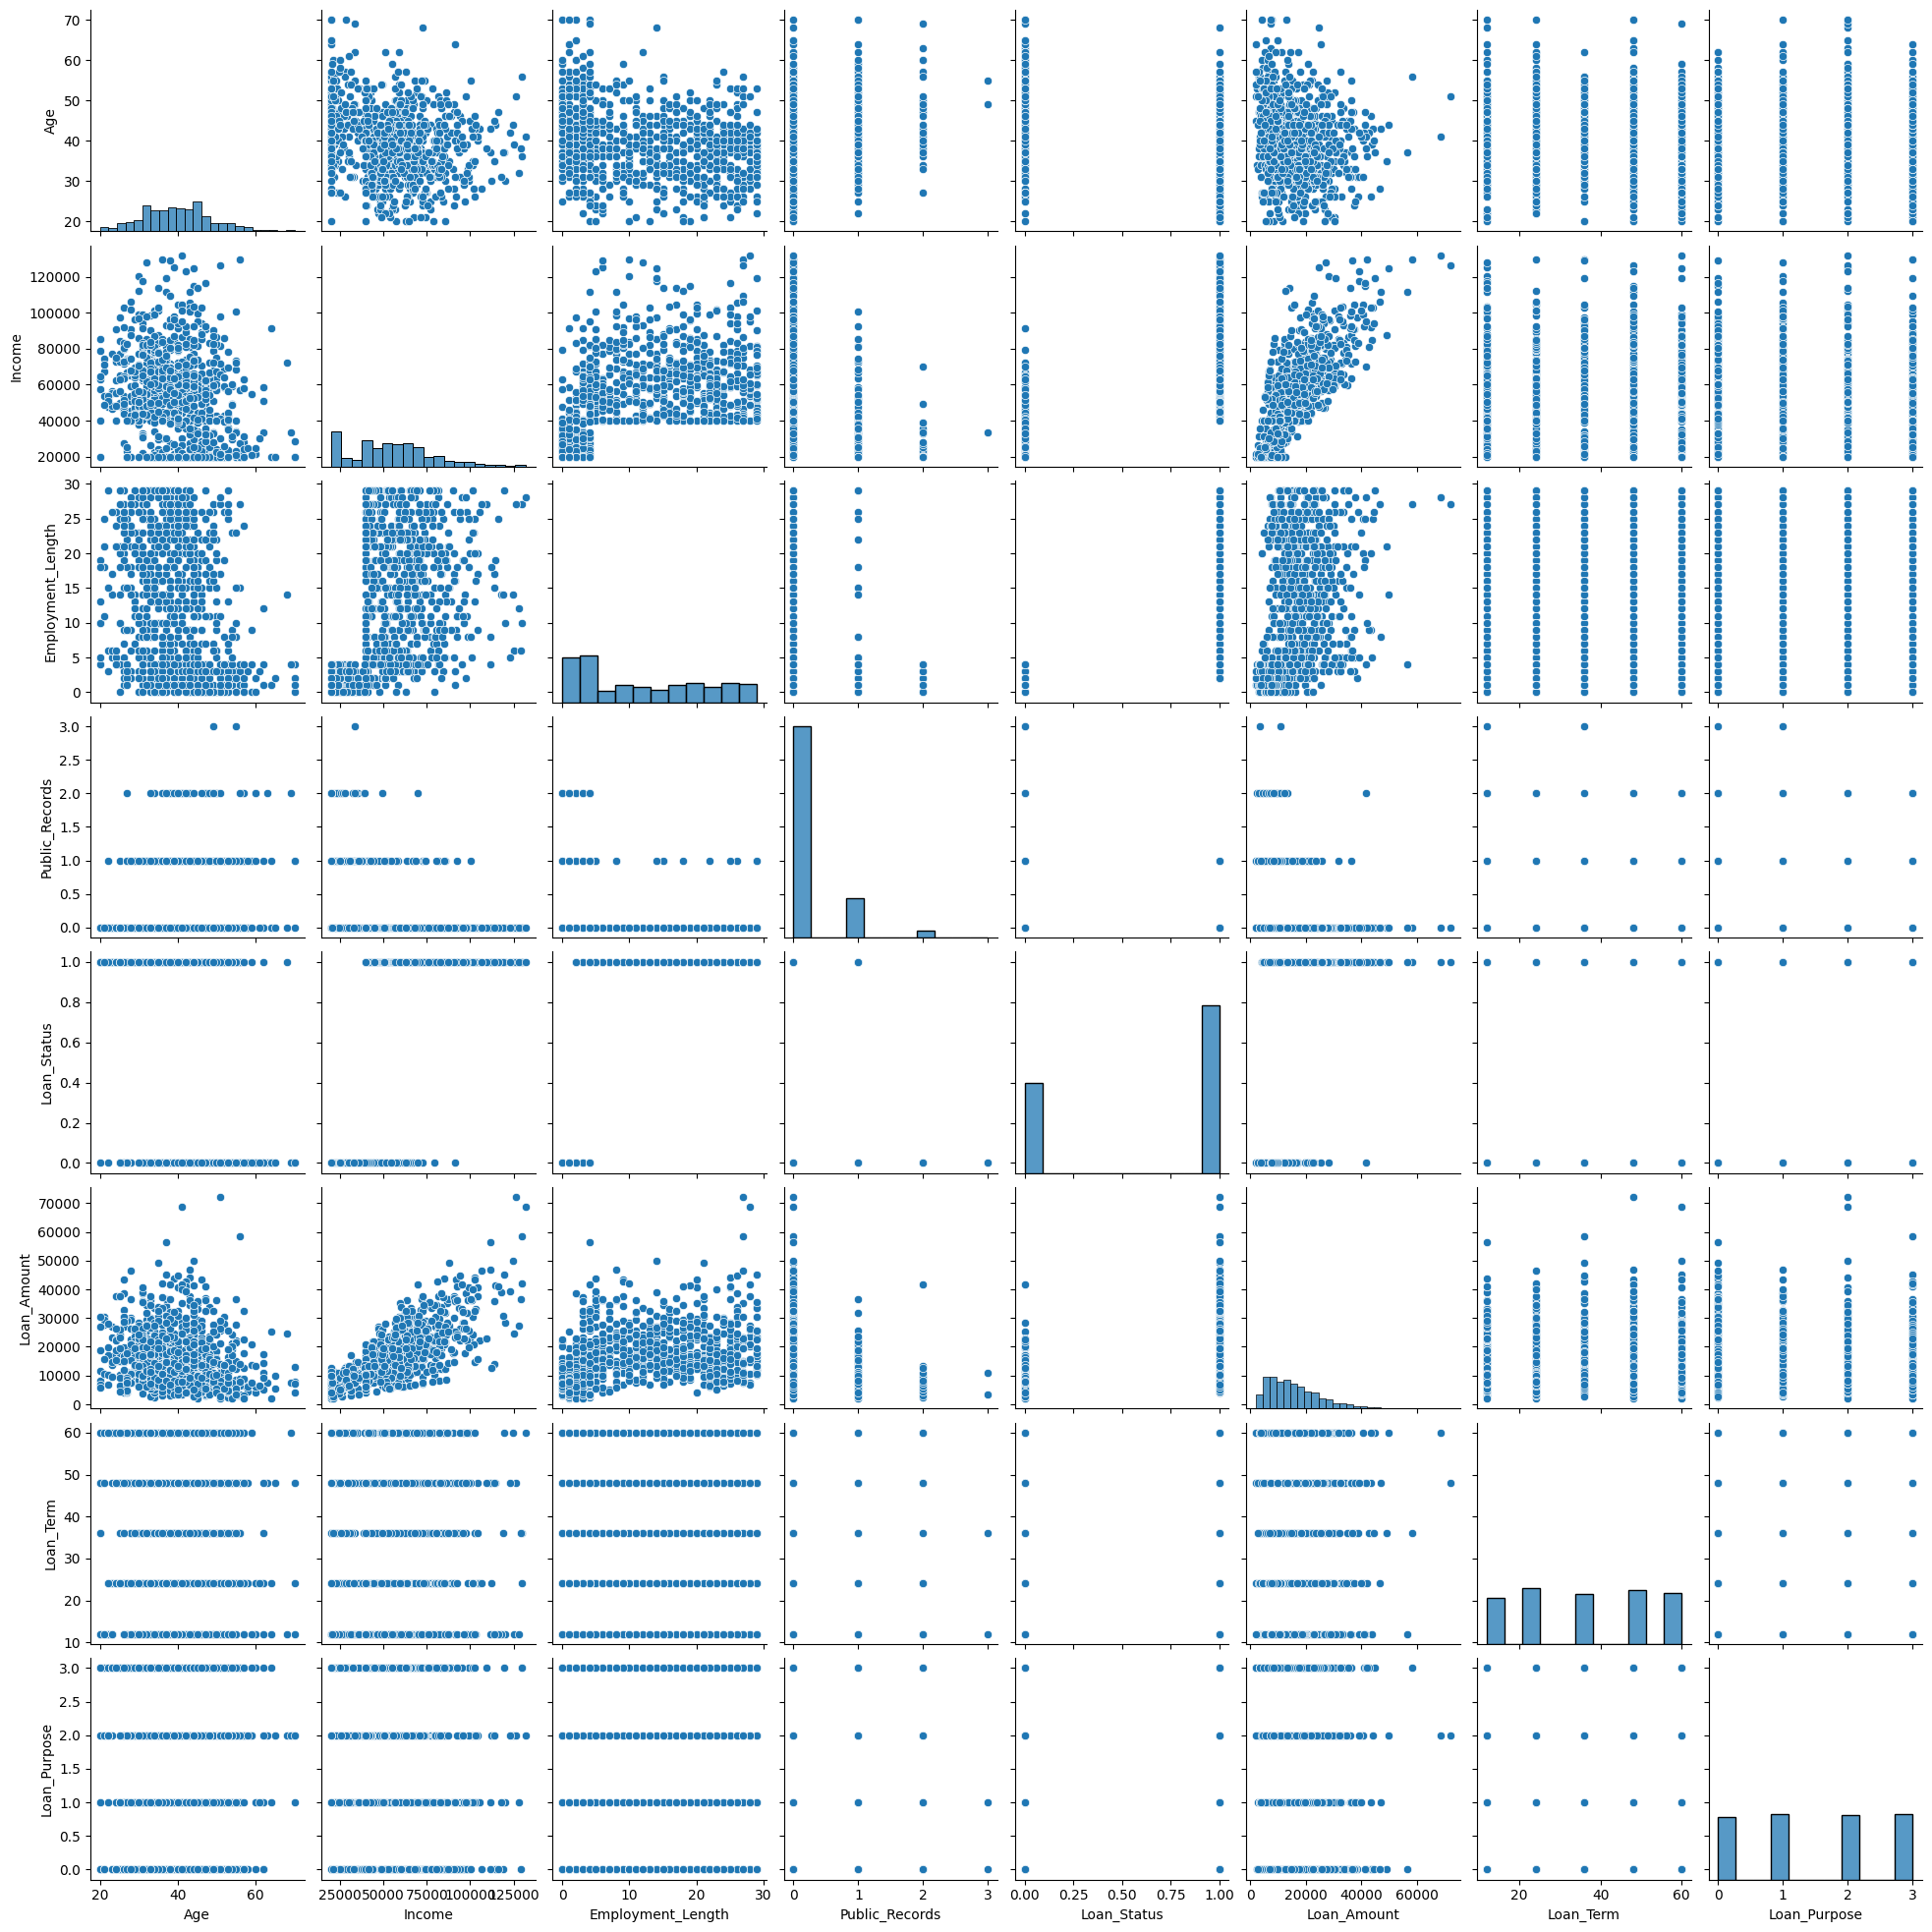

In [504]:
sns.pairplot(df)

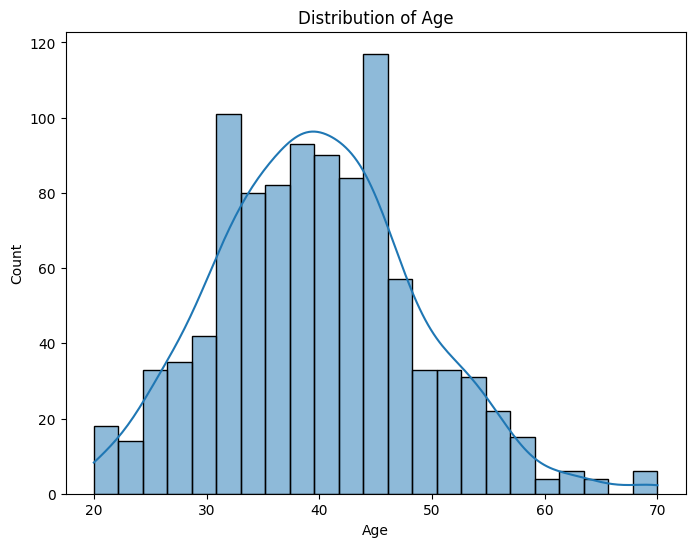

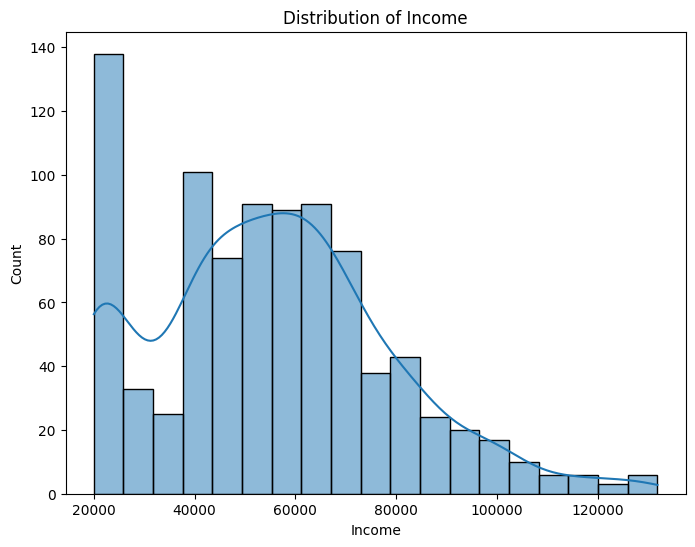

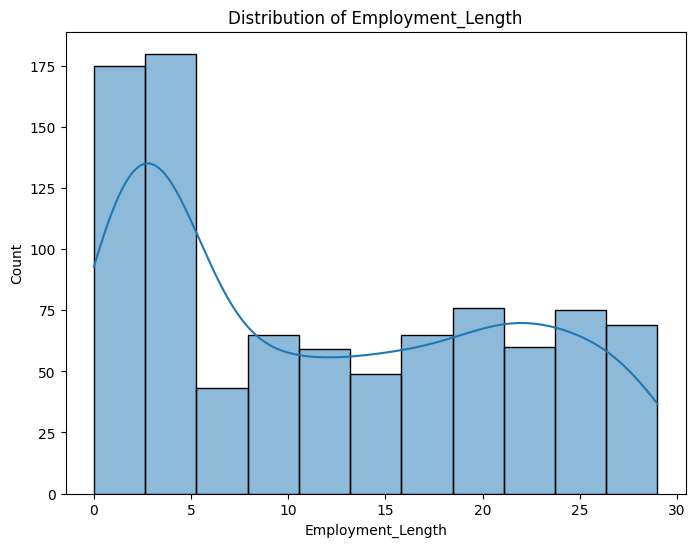

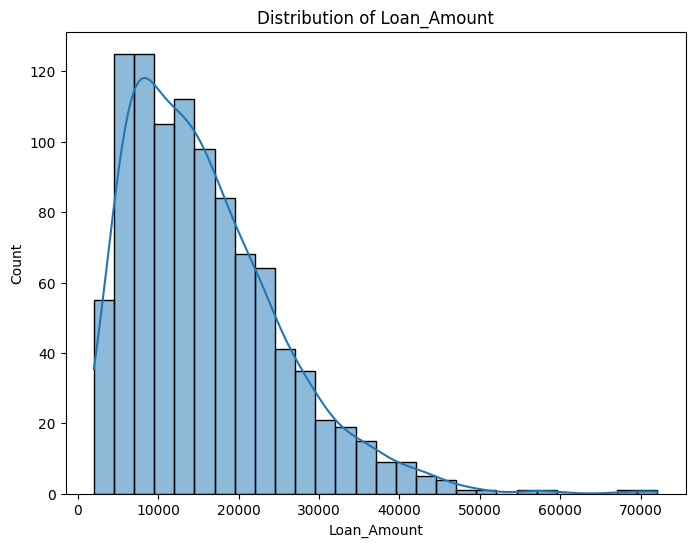

In [505]:
# Univariate Analysis (Numerical Features)
numerical_features = ['Age', 'Income', 'Employment_Length', 'Loan_Amount']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

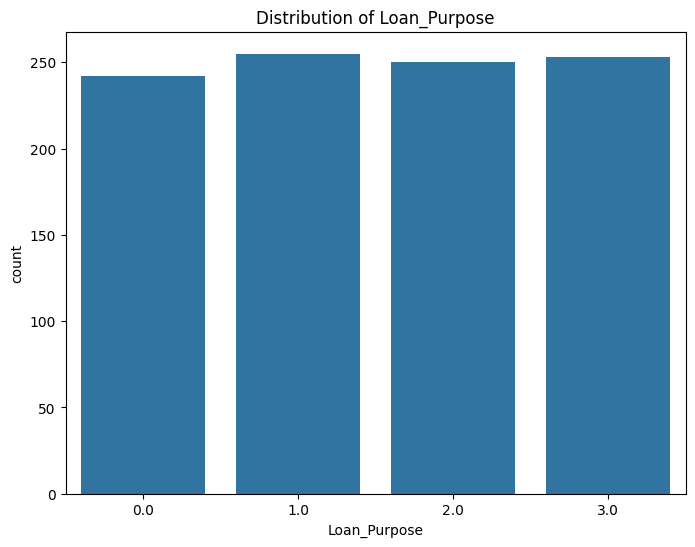

In [506]:
# Univariate Analysis (Categorical Features)
categorical_features = ['Loan_Purpose']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()

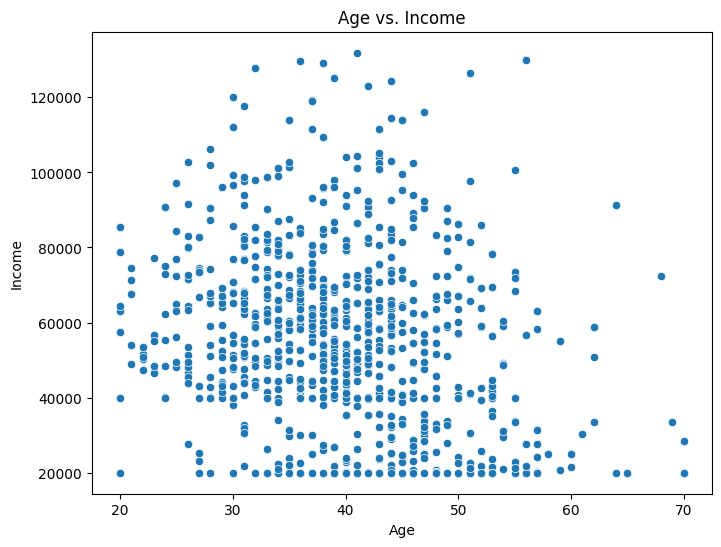

In [507]:
# Bivariate Analysis (Scatter Plots)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Income')
plt.title('Age vs. Income')
plt.show()

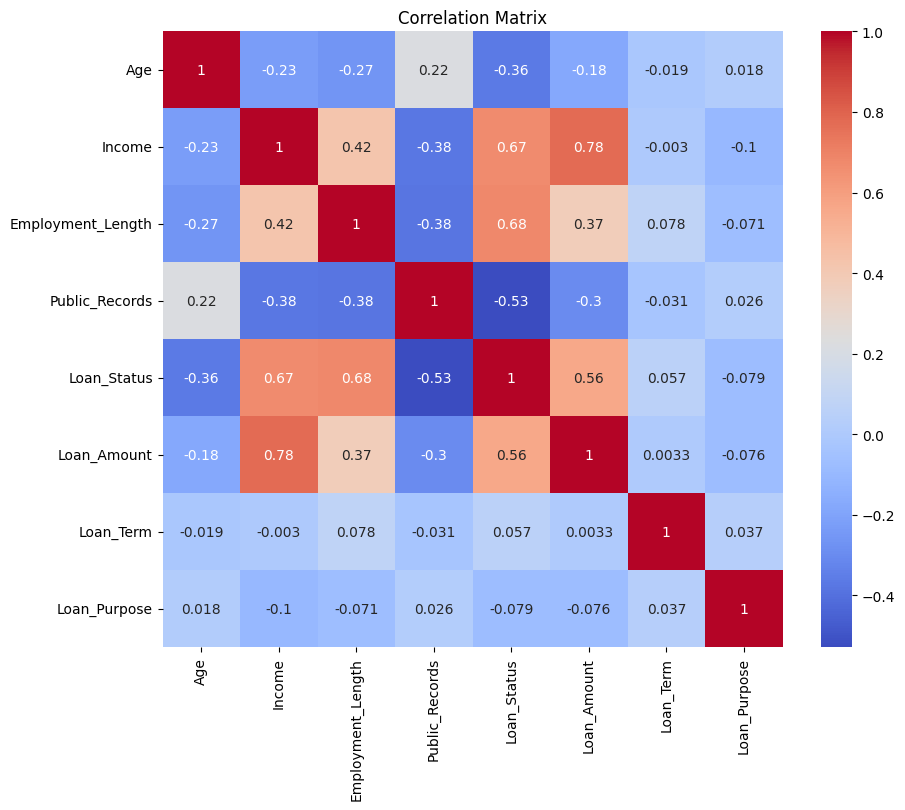

In [508]:
# Bivariate Analysis (Correlation Matrix)
numerical_df = df.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

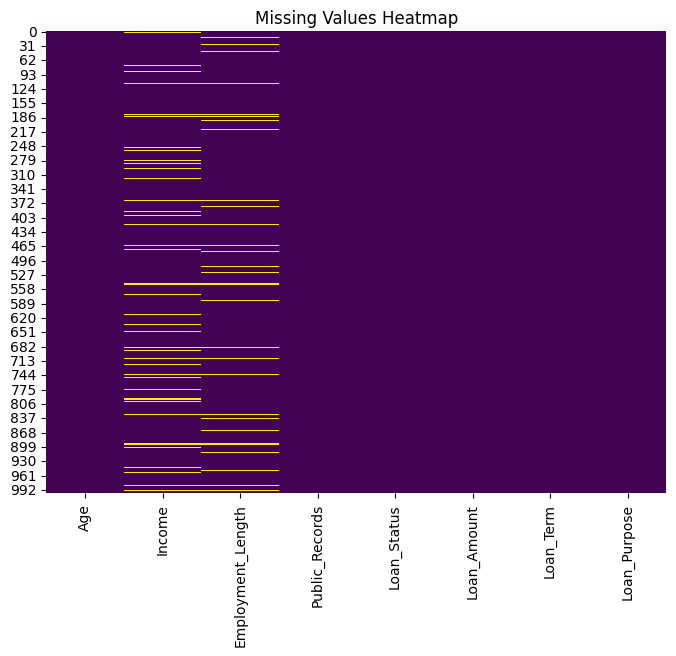

In [509]:
# Missing Value Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [510]:
def preprocess_inputs(df):
    df = df.copy()

    # Check for required columns
    required_columns = ['Income', 'Employment_Length',
                        'Loan_Purpose', 'Loan_Status']
    for col in required_columns:
        if col not in df.columns:
            raise KeyError(f"Column '{col}' not found in the DataFrame.")

    # Split into features (X) and target (y)
    X = df.drop(columns=['Loan_Status'])
    y = df['Loan_Status']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Impute missing values using the training set
    X_train.loc[:, 'Income'] = X_train['Income'].fillna(X_train['Income'].mean())
    X_train.loc[:, 'Employment_Length'] = X_train['Employment_Length'].fillna(X_train['Employment_Length'].median())

    X_test.loc[:, 'Income'] = X_test['Income'].fillna(X_train['Income'].mean())
    X_test.loc[:, 'Employment_Length'] = X_test['Employment_Length'].fillna(X_train['Employment_Length'].median())


    # Scale numerical features using the training set
    numerical_features = ['Age', 'Income', 'Employment_Length', 'Public_Records', 'Loan_Amount', 'Loan_Term', 'Loan_Purpose']
    scaler = StandardScaler()
    X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
    X_test[numerical_features] = scaler.transform(X_test[numerical_features])

    # Save the scaler to a file
    filename = 'scaler.pkl'
    pickle.dump(scaler, open(filename, 'wb'))
    print(f"Scaler saved to {filename}")


    return X_train, X_test, y_train, y_test


In [511]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

Scaler saved to scaler.pkl


In [512]:
X_test

,Age,Income,Employment_Length,Public_Records,Loan_Amount,Loan_Term,Loan_Purpose
521,-1.298307,-0.653116,-0.198202,-0.452792,-0.489302,-0.757752,0.433076
737,-0.742763,0.787021,1.136118,-0.452792,0.728241,-0.757752,0.433076
740,0.812761,-1.050842,-0.976556,1.617116,-1.118030,-1.470929,0.433076
660,-0.853872,0.314901,0.580151,-0.452792,0.017704,0.668604,0.433076
411,0.701652,-1.219947,-1.310136,1.617116,-0.564962,-1.470929,1.337675
...,...,...,...,...,...,...,...
408,-0.631654,1.231585,1.024925,-0.452792,1.001388,1.381782,0.433076
332,0.368326,0.000000,-0.865362,1.617116,-1.190876,-1.470929,1.337675
208,0.257217,0.248779,1.914472,-0.452792,0.760964,0.668604,0.433076
613,-0.631654,-0.705664,-0.198202,3.687023,-0.516710,-1.470929,0.433076


In [513]:
y_test

521    0
737    1
740    0
660    1
411    0
      ..
408    1
332    0
208    1
613    0
78     1
Name: Loan_Status, Length: 200, dtype: int64

In [514]:
models = {
    "Logistic Regression": LogisticRegression(penalty='l1', C=0.2, solver='liblinear', random_state=42), # Added regularization
    "Random Forest": RandomForestClassifier(max_depth=5, random_state=42), # Added max_depth
    "XGBoost": XGBClassifier(max_depth=3, learning_rate=0.1, random_state=42), # Added max_depth and learning_rate
    "SVC": SVC(random_state=42)
}

results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Display results
for model, metrics in results.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()

Model: Logistic Regression
Accuracy: 0.9400
Precision: 0.9348
Recall: 0.9773
F1 Score: 0.9556

Model: Random Forest
Accuracy: 0.9400
Precision: 0.9286
Recall: 0.9848
F1 Score: 0.9559

Model: XGBoost
Accuracy: 0.9600
Precision: 0.9559
Recall: 0.9848
F1 Score: 0.9701

Model: SVC
Accuracy: 0.9350
Precision: 0.9281
Recall: 0.9773
F1 Score: 0.9520



In [515]:
# Evaluate models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy') # Use X_train and y_train
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} (±{scores.std():.4f})")

Logistic Regression Cross-Validation Accuracy: 0.9263 (±0.0174)
Random Forest Cross-Validation Accuracy: 0.9625 (±0.0097)
XGBoost Cross-Validation Accuracy: 0.9762 (±0.0092)
SVC Cross-Validation Accuracy: 0.9287 (±0.0200)


In [516]:
#y_pred = model.predict(X_test)
for name, model in models.items():
  y_pred = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print(name + ": {:.4f}% (Accuracy), RMSE: {:.4f}".format(model.score(X_test, y_test) * 100, rmse))

Logistic Regression: 94.0000% (Accuracy), RMSE: 0.2449
Random Forest: 94.0000% (Accuracy), RMSE: 0.2449
XGBoost: 96.0000% (Accuracy), RMSE: 0.2000
SVC: 93.5000% (Accuracy), RMSE: 0.2550


Feature importance not available for this model.


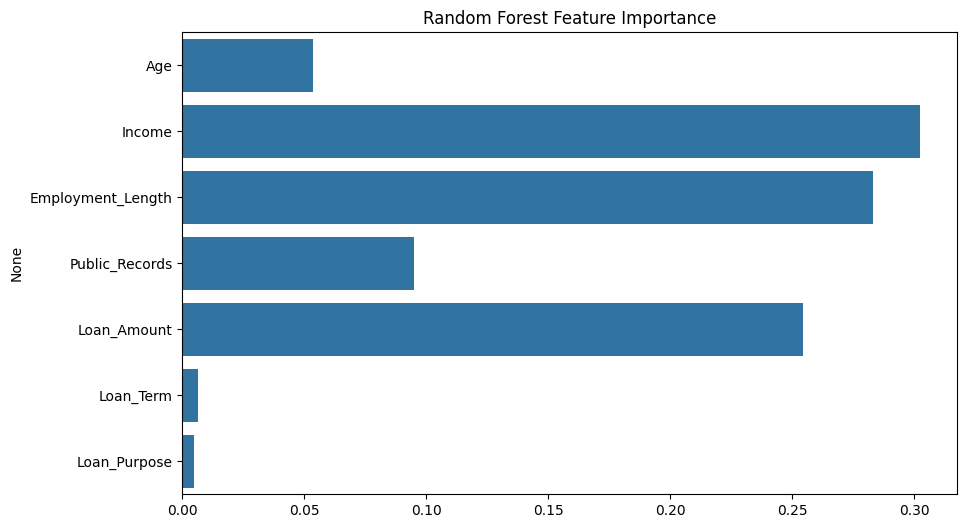

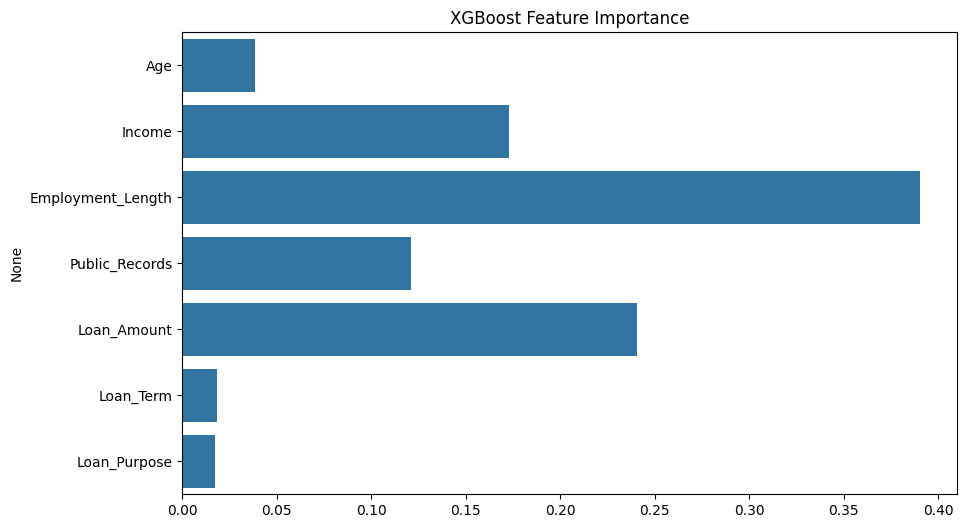

Feature importance not available for this model.


In [517]:
# Get feature importances
for name, model in models.items():
  try:
      model.fit(X_train, y_train)
      importances = model.feature_importances_
      feature_names = X_train.columns

      plt.figure(figsize=(10, 6))
      sns.barplot(x=importances, y=feature_names)
      plt.title(f'{name} Feature Importance')
      plt.show()
  except AttributeError:
      print("Feature importance not available for this model.")

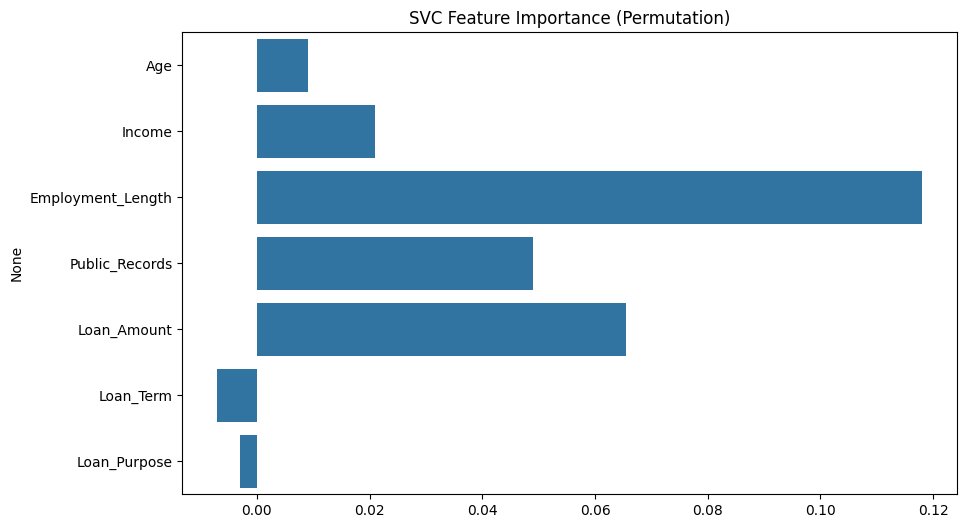

In [518]:
# Train the SVC model
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Calculate permutation importances
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('SVC Feature Importance (Permutation)')
plt.show()

In [519]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # You can increase this for more robust validation
                           scoring='accuracy',
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 300}
Best score: 0.9687514666816854


In [520]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_xgb = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best score: 0.9749889705537251


In [521]:
import pickle

filename = 'loan_approval_model.pkl'
pickle.dump(best_xgb, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to loan_approval_model.pkl
